# 머신러닝 - 지도학습

## <머신러닝 프로세스>
### 1. 데이타 준비 - 데이타 불러오기와 데이타셋 나누기
### 2. 모델 선정 
### 3. 모델 적합 : fit()
### 4. 예측 : predict()
### 5. 성능평가 : + R<sup>2</sup>, + Adjusted R<sup>2</sup>, + RMSE


# 지도학습 - 회귀

## 선형 회귀(Linear Regression)
+ 단순선형회귀(Simple Linear Regression) -- x(설명변수)가 하나
+ 다중선형회귀(Multiple Linear Regression) -- x(설명변수)가 여러개 

## 모델 평가(Evaluation)
+ R<sup>2</sup>, + Adjusted R<sup>2</sup>
+ RMSE
**************

# 선형회귀(Linear Regression)

## 1. 단순선형회귀(Simple Linear Regression) : 보스톤 주택값 예측
- Sklearn의 linear_model 패키지의 Linear Regression 사용
- x 변수(설명변수)로 'RM' 변수, y 변수(종속변수)로 주택 가격
<br><br>
-  sklearn의 model_selection 패키지의 train_test_split 함수 사용
- 데이터를 train, test로 나누어 진행 

### 패키지 불러오기 

In [2]:
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [1]:
# 경고 무시
import warnings
warnings.filterwarnings('ignore')

### 보스톤 주택 데이타셋 불러오기 

In [56]:
from sklearn.datasets import load_boston
boston = load_boston()

In [57]:
boston 

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
data = boston.data    #data
label = boston.target #label
columns = boston.feature_names

In [58]:
data = pd.DataFrame(data, columns = columns)
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [59]:
# boston 데이타 살펴보기 
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- CRIM : 지역별 범죄 발생률
- ZN : 25,000평방피트를 초과하는 거주 지역의 비율
- INDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX : 일산화질소 농도
- RM : 거주할 수 있는 방의 개수
- AGE : 1940년 이전에 건축된 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중 거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000당 재산세율
- PTRATIO : 지역의 교사와 학생수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층의 비율
- MEDV : 본인 소유의 주택 가격(중앙값)

In [60]:
# 보스톤 데이타세트의 target 배열은 주택가격임, 이를 PRICE 컬럼으로 데이타프레임에 추가
data['PRICE'] = boston.target
print('보스톤 데이타세트 크기 : ', data.shape)
data.head(2)

보스톤 데이타세트 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


### 데이터 타입과 Null 값 갯수 확인

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 각 컬럼별로 주택 가격에 미치는 영향 시각화

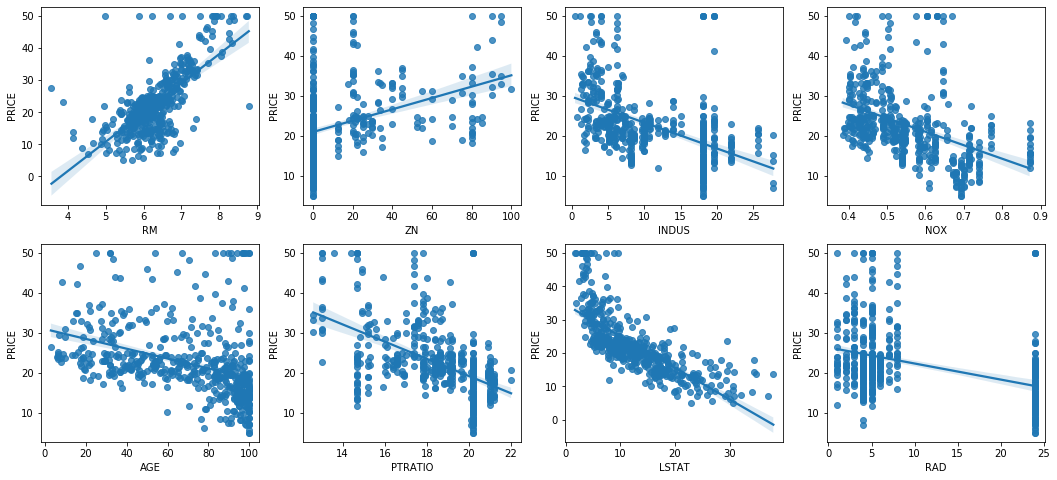

In [9]:
# 2개의 행과 4개의 열을 가진 subplots을 이용, axsms 4x2=8개
fig, axs = plt.subplots(figsize=(18,8),ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = i//4
    col = i%4
    # seaborn의 regplot 이용하여 산점도와 선형회귀직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=data, ax=axs[row][col])

- RM(방의 개수) :양방향의 선형성(Positive Linearity)가 가장 큼, RM이 클수록 PRICE가 증가
- LSTAT(하위계층의 비율) : 음방향의 선형성(Negative Linearity)가 가장 큼, LSTAT가 적을수록 PRICE 증가 

- CRIM : 지역별 범죄 발생률
- ZN : 25,000평방피트를 초과하는 거주 지역의 비율
- INDUS : 비상업 지역 넓이 비율
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX : 일산화질소 농도
- RM : 거주할 수 있는 방의 개수
- AGE : 1940년 이전에 건축된 소유 주택의 비율
- DIS : 5개 주요 고용센터까지의 가중 거리
- RAD : 고속도로 접근 용이도
- TAX : 10,000당 재산세율
- PTRATIO : 지역의 교사와 학생수 비율
- B : 지역의 흑인 거주 비율
- LSTAT : 하위 계층의 비율
- MEDV : 본인 소유의 주택 가격(중앙값)

## 선형회귀

In [62]:
# 보스톤 주택 데이타셋 불러오기 
from sklearn.datasets import load_boston
boston = load_boston()

In [63]:
data = boston.data    #data
label = boston.target #label
columns = boston.feature_names

In [64]:
data = pd.DataFrame(data, columns = columns)
data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


### 데이타셋 나누기 - train, test

In [65]:
# 데이타셋 나누기 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2020) 

# 크기 확인 
x_train.shape, x_test.shape

((404, 13), (102, 13))

## 1. 단순선형회귀모델  
#### x(설명변수): RM,  y(종속변수) : PRICE

### 1) 모델 불러오기 및 정의하기

In [67]:
from sklearn.linear_model import LinearRegression

sim_lr = LinearRegression()

### 2) 모델 학습하기(훈련 데이타)

In [68]:
sim_lr.fit(x_train['RM'].values.reshape((-1, 1)), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 3) 결과 예측하기(테스트 데이타)

In [69]:
y_pred = sim_lr.predict(x_test['RM'].values.reshape((-1,1)))

In [70]:
# 예측 값
y_pred[:5]

array([27.95733816, 22.25345529, 18.84570418, 28.1304592 , 23.62020038])

In [71]:
# 정답
y_test[:5]

array([27.5, 20.5,  6.3, 24.8, 23.1])

### 4) 모델 평가 : R2, RMSE

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

print('보스톤 주택가격 예측 단순선형회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))

보스톤 주택가격 예측 단순선형회귀, R2 : 0.3983
MSE : 51.340, RMSE : 7.165


### 단순 회귀 모델의 계수 w, 절편 b 살펴보기

In [72]:
print('단순 선형 회귀, 계수(w) : {:.1f}, 절편(b) : {:.4f}'.format(np.round(sim_lr.coef_[0],1), sim_lr.intercept_))

단순 선형 회귀, 계수(w) : 9.1, 절편(b) : -34.4756


### 단순 선형 회귀식

- PRICE = -34.4756 + 9.1*RM

### 단순선형회귀 그래프 그리기 

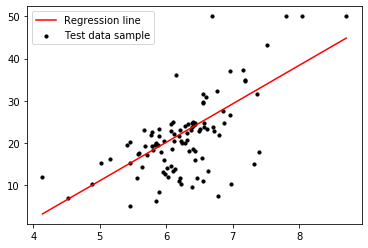

In [73]:
line_x = np.linspace(np.min(x_test['RM']), np.max(x_test['RM']), 10) 
line_y = sim_lr.predict(line_x.reshape((-1, 1)))

plt.scatter(x_test['RM'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c = 'red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

plt.show()

## 2. 다중선형회귀(Multiple Linear Regression) 

### 패키지 불러오기 

In [74]:
# 패키지 불러오기 
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import linear_model

### 보스톤 주택 데이타셋 불러오기 

In [75]:
# 보스톤 주택 데이타셋 불러오기 
from sklearn.datasets import load_boston
boston = load_boston()

In [76]:
data = boston.data    #data
label = boston.target #label
columns = boston.feature_names

In [77]:
data = pd.DataFrame(data, columns = columns)
data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


### train, test 데이타셋 나누기 

In [78]:
# 데이타셋 나누기 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2020) 

# 크기 확인 
x_train.shape, x_test.shape

((404, 13), (102, 13))

## 다중선형회귀모델 : x : 설명변수 전체, y : PRICE

### 1) 모델 불러오기 및 정의하기

In [79]:
from sklearn.linear_model import LinearRegression

mul_lr = LinearRegression()

### 2) 모델 학습하기(훈련 데이타)

In [81]:
mul_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 3) 결과 예측하기(테스트 데이타)

In [82]:
y_pred = mul_lr.predict(x_test)

### 4) 모델 평가 : R2, RMSE

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

print('보스톤 주택가격 예측 다중선형회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))

보스톤 주택가격 예측 다중선형회귀, R2 : 0.7683
MSE : 19.774, RMSE : 4.447


### 다중 회귀 모델의 계수 w, 절편 b 살펴보기

In [84]:
# 회귀 계수와 절편 확인하기 --> 회귀식 
print('다중 선형 회귀(LinearRegression), 계수(w) : {}, 절편(b) : {:.4f}'.format(np.round(mul_lr.coef_,1),  mul_lr.intercept_))

다중 선형 회귀(LinearRegression), 계수(w) : [ -0.1   0.    0.    2.2 -16.9   3.9   0.   -1.4   0.3  -0.   -0.9   0.
  -0.5], 절편(b) : 34.6673


In [85]:
# 회귀 계수가 큰 값 순으로 정렬학 이해 Series로 생성, 인덱스 컬럼에 유의
coeff = pd.Series(data=np.round(mul_lr.coef_,1), index=data.columns)
coeff.sort_values(ascending=False)

RM          3.9
CHAS        2.2
RAD         0.3
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
ZN          0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.4
NOX       -16.9
dtype: float64

### 최종 다중선형회귀식 

- 다중 선형 회귀식(LinearRegression) : PRICE = 34.6673 + 3.9*RM + 2.2*CHAS+...

## K-Fold 검증 : K=5

In [40]:
from sklearn.model_selection import cross_val_score

y_target = boston.target
x_data = boston.data
lr = LinearRegression()

# cross_val_score()로 5-폴드 세트로 MSE를 구한 뒤 이를 기반으로 RMSE 구함
neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
arg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('5-folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores,2))
print('5-folds의 개별 Negative RMSE scores : ', np.round(rmse_scores,2))
print('5-folds의 평균 RMSE : ', np.round(arg_rmse))

5-folds의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5-folds의 개별 Negative RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5-folds의 평균 RMSE :  6.0


- RMSE가 낮을 수록 좋은 회귀모델

## K-Fold 검증 : K=10

In [41]:
from sklearn.model_selection import cross_val_score

y_target = boston.target
x_data = boston.data
lr = LinearRegression()

# cross_val_score()로 10-폴드 세트로 MSE를 구한 뒤 이를 기반으로 RMSE 구함
neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-1*neg_mse_scores)
arg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print('10-folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores,2))
print('10-folds의 개별 Negative RMSE scores : ', np.round(rmse_scores,2))
print('10-folds의 평균 RMSE : ', np.round(arg_rmse))

10-folds의 개별 Negative MSE scores :  [  -9.29  -14.15  -14.07  -35.21  -31.89  -19.84   -9.95 -168.38  -33.33
  -10.96]
10-folds의 개별 Negative RMSE scores :  [ 3.05  3.76  3.75  5.93  5.65  4.45  3.15 12.98  5.77  3.31]
10-folds의 평균 RMSE :  5.0


## statsmodels 라이브러리를 이용한 선형회귀 분석

In [105]:
import pandas as pd

height = [170, 168, 177, 181 ,172, 171, 169, 175, 174, 178, 170, 167, 177, 182 ,173, 171, 170, 179, 175, 177, 186, 166, 183, 168]
weight = [70, 66, 73, 77, 74, 73, 69, 79, 77, 80, 74, 68, 71, 76, 78, 72, 68, 79, 77, 81, 84, 73, 78, 69]

body = pd.DataFrame(
    {'height': height,
    'weight': weight
    }
)

body.tail()

,height,weight
19,177,81
20,186,84
21,166,73
22,183,78
23,168,69


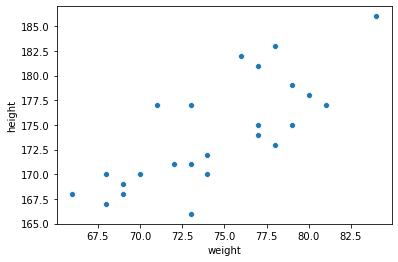

In [106]:
import seaborn as sns
sns.scatterplot(x='weight', y='height', data=body)

In [107]:
body.corr()

,height,weight
height,1.000000,0.767664
weight,0.767664,1.000000


### 단순 선형 회귀

In [1]:
# 단순 선형회귀(종속변수:1개, 독립변수(설명변수): 1개)
#  pip install statsmodels 로 모듈 설치 필요
import statsmodels.api as sm

result = sm.OLS.from_formula("height ~ weight", body).fit()
result.summary()

NameError: name 'body' is not defined

In [109]:
## 계수와 절편 
result.params

Intercept    107.862423
weight         0.890427
dtype: float64

In [110]:
## 결과값과 예측값 비교 
body['height'][:5]

0    170
1    168
2    177
3    181
4    172
Name: height, dtype: int64

In [111]:
result.predict(body[:5])

0    170.192283
1    166.630576
2    172.863562
3    176.425269
4    173.753989
dtype: float64

### 다중 선형 회귀

In [102]:
# 다중 선형회귀(종속변수:1개, 독립변수(설명변수): 2개 이상)
import pandas as pd

height = [170, 168, 177, 181 ,172, 171, 169, 175, 174, 178, 170, 167, 177, 182 ,173, 171, 170, 179, 175, 177, 186, 166, 183, 168]
weight1 = [70, 66, 73, 77, 74, 73, 69, 79, 77, 80, 74, 68, 71, 76, 78, 72, 68, 79, 77, 81, 84, 73, 78, 69]
weight2 = pd.Series(weight1) + 5
body = pd.DataFrame(
    {'height': height,
    'weight1': weight1,
    'weight2': weight2     
    }
)

body.tail()

,height,weight1,weight2
19,177,81,86
20,186,84,89
21,166,73,78
22,183,78,83
23,168,69,74


### 다중 선형 회귀

In [112]:
import statsmodels.api as sm

result = sm.OLS.from_formula("height ~ weight1+weight2", body).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     31.57
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.20e-05
Time:                        14:44:48   Log-Likelihood:                -63.655
No. Observations:                  24   AIC:                             131.3
Df Residuals:                      22   BIC:                             133.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8249      0.905      8.650      0.000       5.949       9.701
weight1      -19.1171      2.341     -8.168      0.000     -23.971     -14.263
weight2       20.0075      2.182      9.168      0.000      15.482      24.533
==============================================================================
Omnibus:                        0.796   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.672   Jarque-Bera (JB):                0.829
Skew:                           0.329   Prob(JB):                        0.661
Kurtosis:                       2.371   Cond. No.                     1.81e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.73e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [113]:
result.params

Intercept     7.824915
weight1     -19.117075
weight2      20.007501
dtype: float64

- 다중선형회귀식 : height = 7.824915 -19.117075*weight1 + 20.00750*weight2